In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [3]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print("Number of unique train users: ", num_train_users)
print("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [4]:
# 유저별 시청 영화 수 계산
movies_watched_per_user = train_df.groupby('user')['item'].count()
movies_watched_per_user.sort_values(ascending=False)

user
8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: item, Length: 31360, dtype: int64

In [5]:
print(movies_watched_per_user.max()) 
# 가장 많은 영화를 본 유저의 시청 영화 수 너무 많네?

2912


In [6]:
train_df[train_df['user'] == 8405]

,user,item,time
315136,8405,1252,1160462492
315137,8405,1278,1160462504
315138,8405,2599,1160462620
315139,8405,3408,1160462658
315140,8405,2268,1160462698
...,...,...,...
318043,8405,1967,1336360450
318044,8405,2966,1344146938
318045,8405,356,1344220422
318046,8405,69685,1359355760


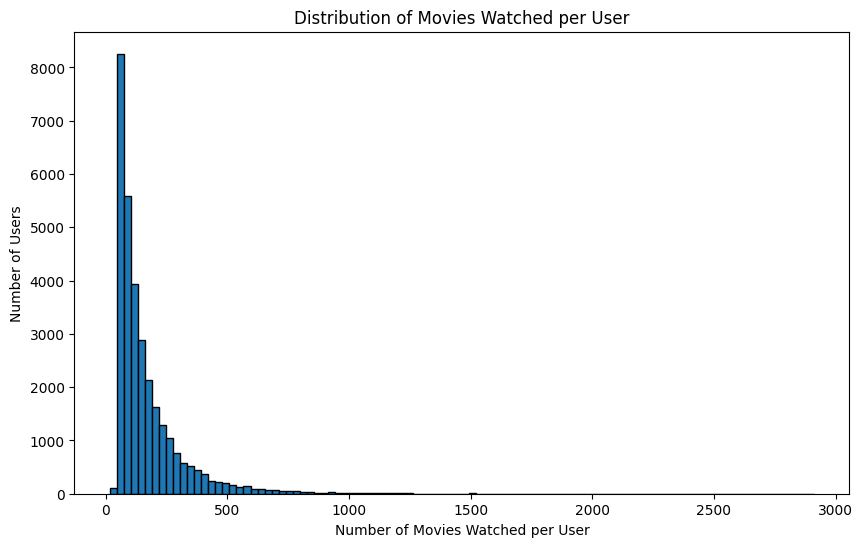

In [7]:
# 사용자별 시청 영화 수 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(movies_watched_per_user, bins=100, edgecolor='k')
plt.xlabel('Number of Movies Watched per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Movies Watched per User')
plt.show()

대부분 유저가 300개 이내 영화를 시청함

In [8]:
# 영화별 시청 유저 수
users_per_movie = train_df.groupby('item')['user'].count()
users_per_movie.sort_values(ascending=False)

item
2571      19699
2959      18437
296       18202
318       18168
356       17339
          ...  
117881       38
126          36
2555         34
4241         34
51372        27
Name: user, Length: 6807, dtype: int64

In [9]:
print(users_per_movie.max())
print(users_per_movie.min())

19699
27


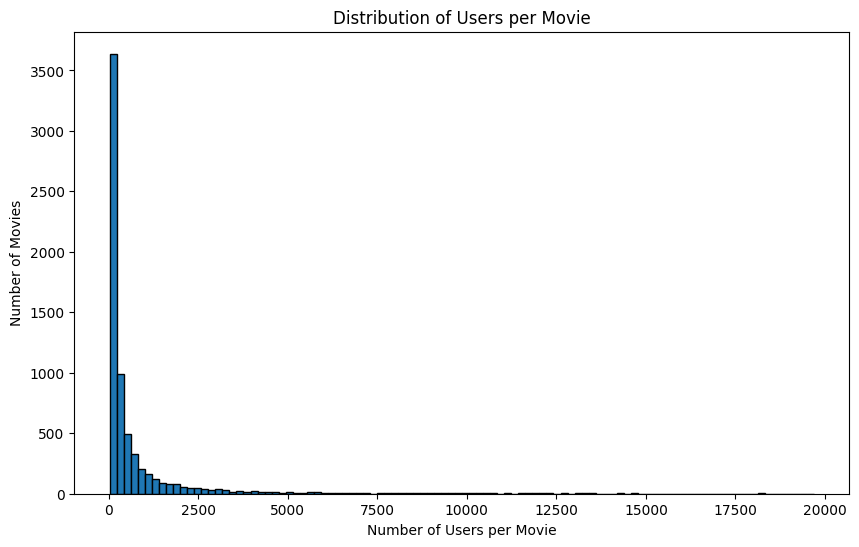

In [10]:
# 영화별 시청 유저 수 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(users_per_movie, bins=100, edgecolor='k')
plt.xlabel('Number of Users per Movie')
plt.ylabel('Number of Movies')
plt.title('Distribution of Users per Movie')
plt.show()

In [11]:
# 타임스탬프를 연-월, 시간으로 변환
train_df['date'] = pd.to_datetime(train_df['time'], unit='s')

train_df

,user,item,time,date
0,11,4643,1230782529,2009-01-01 04:02:09
1,11,170,1230782534,2009-01-01 04:02:14
2,11,531,1230782539,2009-01-01 04:02:19
3,11,616,1230782542,2009-01-01 04:02:22
4,11,2140,1230782563,2009-01-01 04:02:43
...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49
5154467,138493,4958,1260209482,2009-12-07 18:11:22
5154468,138493,68319,1260209720,2009-12-07 18:15:20
5154469,138493,40819,1260209726,2009-12-07 18:15:26


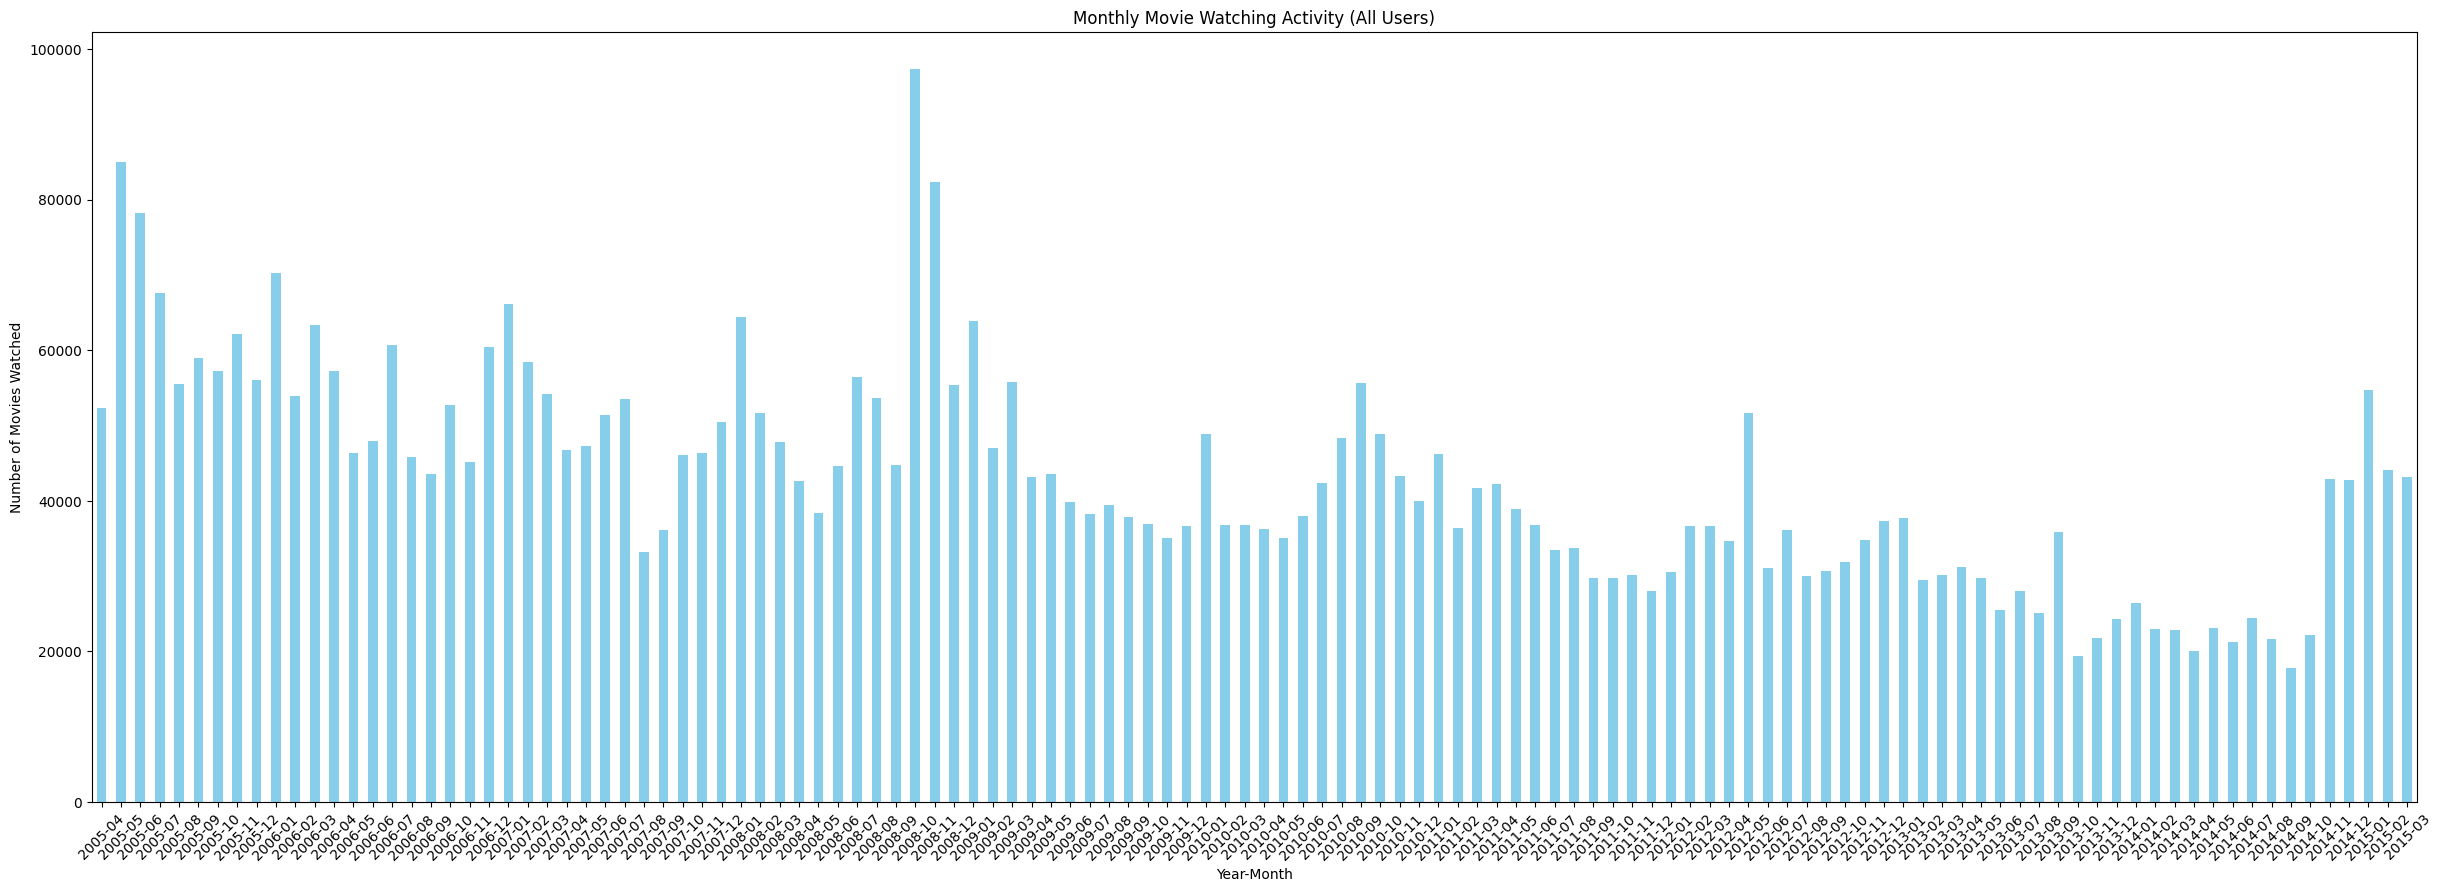

In [12]:
# 연월, 시간 변수
year_month = train_df['date'].dt.to_period('M')
hour = train_df['date'].dt.hour
year_month_counts = year_month.value_counts().sort_index()

# 영화 시청 연월 분포 시각화
plt.figure(figsize=(30, 10))
year_month_counts.plot(kind='bar', color='skyblue')
plt.title('Monthly Movie Watching Activity (All Users)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Movies Watched')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 유저별 시청 트렌드


In [19]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')

merged_df = pd.merge(train_df, year_data, on='item', how='left')

merged_df['watch_year'] = pd.to_datetime(merged_df['time'], unit='s').dt.year

watch_counts_by_year = merged_df.groupby(['year', 'watch_year']).size().reset_index(name='watch_count')

watch_counts_by_year



,year,watch_year,watch_count
0,1922.0,2005,150
1,1922.0,2006,163
2,1922.0,2007,121
3,1922.0,2008,128
4,1922.0,2009,147
...,...,...,...
975,2013.0,2013,9155
976,2013.0,2014,20388
977,2013.0,2015,5935
978,2014.0,2014,10143


In [20]:
total_watch_counts_per_release_year = watch_counts_by_year.groupby('year')['watch_count'].sum().reset_index(name='total_watch_count_per_year')
total_watch_counts_per_release_year

,year,total_watch_count_per_year
0,1922.0,1229
1,1923.0,352
2,1924.0,781
3,1925.0,2016
4,1926.0,910
...,...,...
88,2010.0,100070
89,2011.0,67438
90,2012.0,53674
91,2013.0,35479


In [22]:
watch_counts_by_year = pd.merge(watch_counts_by_year, total_watch_counts_per_release_year, on='year', how='left')
watch_counts_by_year

,year,watch_year,watch_count,total_watch_count_per_year
0,1922.0,2005,150,1229
1,1922.0,2006,163,1229
2,1922.0,2007,121,1229
3,1922.0,2008,128,1229
4,1922.0,2009,147,1229
...,...,...,...,...
975,2013.0,2013,9155,35479
976,2013.0,2014,20388,35479
977,2013.0,2015,5935,35479
978,2014.0,2014,10143,18743


In [24]:
watch_counts_by_year['watch_count_ratio'] = watch_counts_by_year['watch_count'] / watch_counts_by_year['total_watch_count_per_year']

watch_counts_filtered = watch_counts_by_year[(watch_counts_by_year['year'] >= 1920) & 
                                              (watch_counts_by_year['year'] <= 2014)]
watch_counts_filtered

,year,watch_year,watch_count,total_watch_count_per_year,watch_count_ratio
0,1922.0,2005,150,1229,0.122050
1,1922.0,2006,163,1229,0.132628
2,1922.0,2007,121,1229,0.098454
3,1922.0,2008,128,1229,0.104150
4,1922.0,2009,147,1229,0.119609
...,...,...,...,...,...
975,2013.0,2013,9155,35479,0.258040
976,2013.0,2014,20388,35479,0.574650
977,2013.0,2015,5935,35479,0.167282
978,2014.0,2014,10143,18743,0.541162


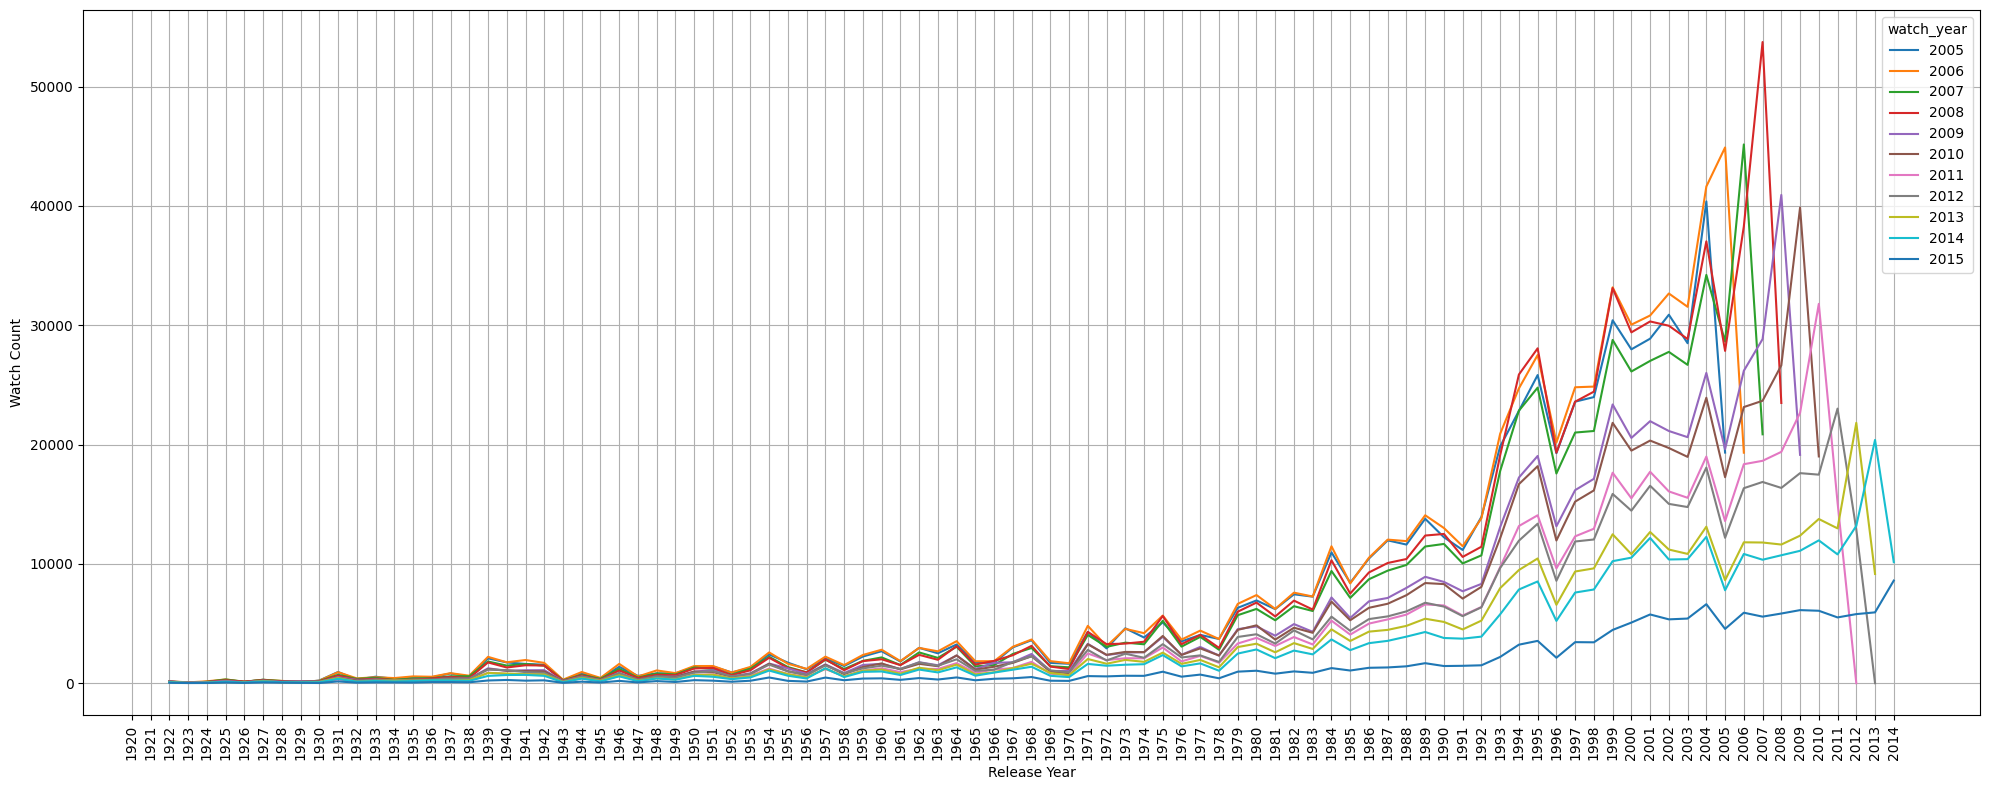

In [28]:
plt.figure(figsize=(20, 8))

sns.lineplot(x='year', y='watch_count', hue='watch_year', data=watch_counts_filtered, palette='tab10')

plt.xlabel('Release Year')
plt.ylabel('Watch Count')
plt.xticks(range(1920, 2015), rotation=90)  
plt.grid(True)

plt.tight_layout()
plt.show()

메타 데이터 활용

In [15]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

연도 데이터

In [16]:
year_data.info()
year_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [17]:
print(train_df['item'].nunique())
print(year_data['item'].nunique())
# 전체 영화 개수 6807개에서 연도가 없는 영화는 8개

6807
6799


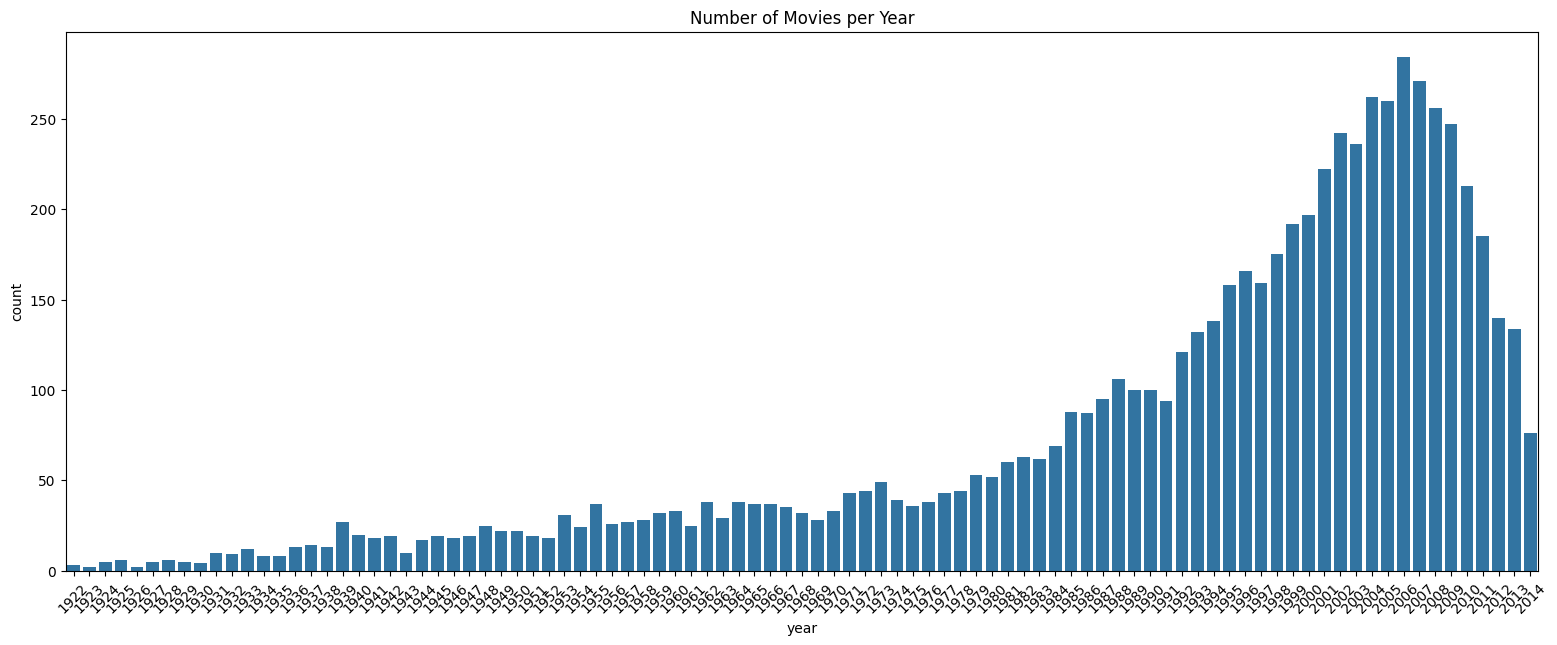

In [18]:
# 연도별 영화 개수
plt.figure(figsize=(19, 7))
sns.countplot(data=year_data, x='year')
plt.title('Number of Movies per Year')
plt.xticks(rotation=45)
plt.show()

연도 데이터 채우기

In [19]:
all_data = pd.merge(train_df, title_data, on='item', how='left').merge(year_data, on='item', how='left')
all_data

,user,item,time,date,title,year
0,11,4643,1230782529,2009-01-01 04:02:09,Planet of the Apes (2001),2001.0
1,11,170,1230782534,2009-01-01 04:02:14,Hackers (1995),1995.0
2,11,531,1230782539,2009-01-01 04:02:19,"Secret Garden, The (1993)",1993.0
3,11,616,1230782542,2009-01-01 04:02:22,"Aristocats, The (1970)",1970.0
4,11,2140,1230782563,2009-01-01 04:02:43,"Dark Crystal, The (1982)",1982.0
...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,Ice Age 2: The Meltdown (2006),2006.0
5154467,138493,4958,1260209482,2009-12-07 18:11:22,Behind Enemy Lines (2001),2001.0
5154468,138493,68319,1260209720,2009-12-07 18:15:20,X-Men Origins: Wolverine (2009),2009.0
5154469,138493,40819,1260209726,2009-12-07 18:15:26,Walk the Line (2005),2005.0


In [20]:
all_data.isna().sum()

user        0
item        0
time        0
date        0
title       0
year     1832
dtype: int64

In [21]:
import re

# title에서 연도 추출
all_data['extracted_year'] = all_data['title'].apply(lambda x: int(re.search(r'\((\d{4})\)', x).group(1)) if re.search(r'\((\d{4})\)', x) else None)

# 결측치 채우기
all_data['year'] = all_data['year'].fillna(all_data['extracted_year'])

# 불필요한 열 삭제
all_data.drop(columns=['extracted_year'], inplace=True)

# 결과 확인
print(all_data.isna().sum())

user     0
item     0
time     0
date     0
title    0
year     0
dtype: int64


Writer 데이터

nm0099541 : IMDb 고유 식별자

In [22]:
# 작가별 작품 수
writer_counts = writer_data['writer'].value_counts()
writer_counts.head(10)

writer
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
nm0000697    27
nm0000455    26
nm0001220    25
nm0000041    23
nm0744429    21
Name: count, dtype: int64

In [23]:
print(writer_data['item'].nunique())
# 작가가 없는 영화 6807 - 5648 = 1159개

5648


In [24]:
print(writer_data['writer'].nunique())

2989


In [25]:
# 작가별 영화 수
movies_per_writer = writer_data.groupby('writer')['item'].nunique()

print(movies_per_writer.sort_values(ascending=False).max())  
print(movies_per_writer.sort_values(ascending=False).min()) 

47
2


In [26]:
# 영화별 작가 수
writers_per_movie = writer_data.groupby('item')['writer'].nunique()

print(writers_per_movie.max())
print(writers_per_movie.min())
# 영화별 작가수 최대 24명, 최소 2명

24
1


/tmp/ipykernel_393588/1876093219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_writers.values, y=top_writers.index, palette='viridis')


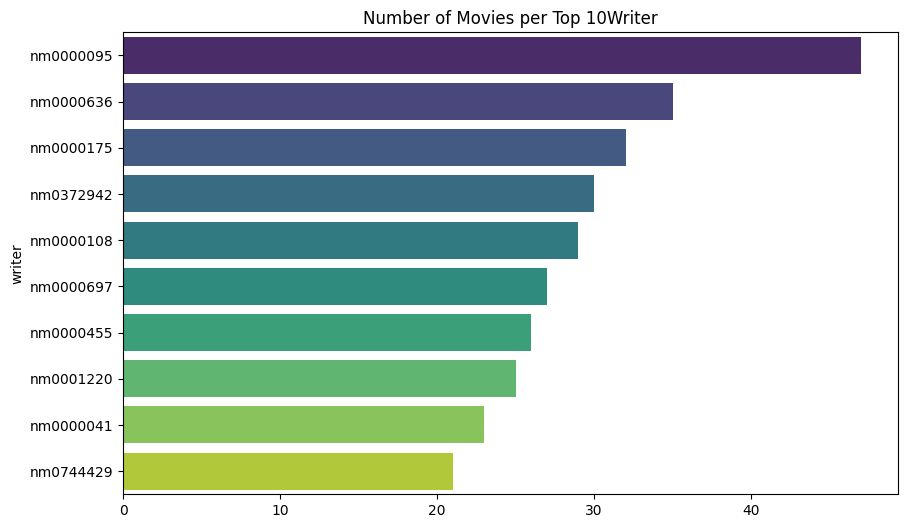

In [27]:
# 상위 10명 작가별 영화 개수
top_writers = writer_data['writer'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_writers.values, y=top_writers.index, palette='viridis')
plt.title('Number of Movies per Top 10Writer')
plt.show()

In [28]:
# writer_data에서 작가 ID를 리스트로 변환
writer_data['writer_list'] = writer_data['writer'].apply(lambda x: x.split(','))

# item별로 작가 리스트를 결합
writers_per_item = writer_data.groupby('item')['writer_list'].agg(lambda x: sum(x, [])).reset_index()

# all_data에 병합
all_data = pd.merge(all_data, writers_per_item, on='item', how='left')

# 결측치 []로 변환
all_data['writer_list'] = all_data['writer_list'].apply(lambda x: x if isinstance(x, list) else [])


In [29]:
all_data

,user,item,time,date,title,year,writer_list
0,11,4643,1230782529,2009-01-01 04:02:09,Planet of the Apes (2001),2001.0,"[nm0099541, nm0115310, nm0465199, nm0742797]"
1,11,170,1230782534,2009-01-01 04:02:14,Hackers (1995),1995.0,[]
2,11,531,1230782539,2009-01-01 04:02:19,"Secret Garden, The (1993)",1993.0,"[nm0003031, nm0122364]"
3,11,616,1230782542,2009-01-01 04:02:22,"Aristocats, The (1970)",1970.0,"[nm0027011, nm0166307, nm0166551, nm0314788, n..."
4,11,2140,1230782563,2009-01-01 04:02:43,"Dark Crystal, The (1982)",1982.0,"[nm0001345, nm0643973]"
...,...,...,...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49,Ice Age 2: The Meltdown (2006),2006.0,"[nm0310087, nm0841532, nm5022110]"
5154467,138493,4958,1260209482,2009-12-07 18:11:22,Behind Enemy Lines (2001),2001.0,"[nm0672015, nm0859029, nm0859049, nm0892705]"
5154468,138493,68319,1260209720,2009-12-07 18:15:20,X-Men Origins: Wolverine (2009),2009.0,"[nm0940790, nm1125275]"
5154469,138493,40819,1260209726,2009-12-07 18:15:26,Walk the Line (2005),2005.0,"[nm0003506, nm0219456]"


In [30]:
# from sklearn.preprocessing import MultiLabelBinarizer
# from scipy.sparse import csr_matrix

# # MultiLabelBinarizer를 사용하여 작가 정보를 이진 벡터로 변환
# mlb = MultiLabelBinarizer()
# writer_encoded = mlb.fit_transform(all_data['writer_list'])

# # 희소 행렬로 변환
# writer_encoded_sparse = csr_matrix(writer_encoded)

# # 필요 없는 열 삭제
# all_data.drop(columns=['writer_list'], inplace=True)

Title 데이터

In [31]:
print(title_data['title'].nunique())
print(title_data['item'].nunique())
# 제목이 없는 영화 1개

6806
6807


In [32]:
title_data[title_data.duplicated('title', keep=False)]
# 중복 값 존재

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


In [33]:
# title_data에서 동일한 제목을 가진 서로 다른 item을 찾기
duplicate_titles = all_data[all_data.duplicated('title', keep=False)]

# 동일한 제목을 가진 item들을 그룹화하여 확인
grouped_duplicates = duplicate_titles.groupby('title')['item'].nunique()

# 동일한 제목을 가진 서로 다른 item이 있는 경우 필터링
multiple_items_per_title = grouped_duplicates[grouped_duplicates > 1]

# 결과 출력
print("동일한 제목을 가진 서로 다른 item이 있는 경우:")
print(multiple_items_per_title)

동일한 제목을 가진 서로 다른 item이 있는 경우:
title
War of the Worlds (2005)    2
Name: item, dtype: int64


In [34]:
display(all_data[all_data['item']==34048].head(10))
display(all_data[all_data['item']==64997].head(10))

,user,item,time,date,title,year,writer_list
126,11,34048,1230788489,2009-01-01 05:41:29,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
5630,208,34048,1157583328,2006-09-06 22:55:28,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
7675,258,34048,1221520795,2008-09-15 23:19:55,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
11320,367,34048,1120865002,2005-07-08 23:23:22,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
12619,388,34048,1174643516,2007-03-23 09:51:56,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
13453,409,34048,1336496531,2012-05-08 17:02:11,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
14315,422,34048,1193455941,2007-10-27 03:32:21,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
15442,440,34048,1275606983,2010-06-03 23:16:23,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
16542,462,34048,1140175853,2006-02-17 11:30:53,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"
17346,492,34048,1191933047,2007-10-09 12:30:47,War of the Worlds (2005),2005.0,"[nm0295264, nm0462895, nm0920229]"


,user,item,time,date,title,year,writer_list
349,11,64997,1251170446,2009-08-25 03:20:46,War of the Worlds (2005),2005.0,[nm0920229]
20178,572,64997,1324349773,2011-12-20 02:56:13,War of the Worlds (2005),2005.0,[nm0920229]
77255,2024,64997,1279975284,2010-07-24 12:41:24,War of the Worlds (2005),2005.0,[nm0920229]
78909,2070,64997,1278507920,2010-07-07 13:05:20,War of the Worlds (2005),2005.0,[nm0920229]
200538,5063,64997,1246485085,2009-07-01 21:51:25,War of the Worlds (2005),2005.0,[nm0920229]
205486,5157,64997,1262058495,2009-12-29 03:48:15,War of the Worlds (2005),2005.0,[nm0920229]
261321,6874,64997,1276826677,2010-06-18 02:04:37,War of the Worlds (2005),2005.0,[nm0920229]
317824,8405,64997,1230900188,2009-01-02 12:43:08,War of the Worlds (2005),2005.0,[nm0920229]
325155,8577,64997,1345600904,2012-08-22 02:01:44,War of the Worlds (2005),2005.0,[nm0920229]
343268,9118,64997,1262306912,2010-01-01 00:48:32,War of the Worlds (2005),2005.0,[nm0920229]


영화 이름만 같고 메타데이터 정보는 다름. 작가만 한 명 겹치는데 다른 버전의 영화?  
이름을 수정해준다고 하면 추천할 때 영향을 미칠 수 있을 것 같음

In [35]:
# 특정 item의 title 수정
all_data.loc[all_data['item'] == 34048, 'title'] = all_data.loc[all_data['item'] == 34048, 'title'] + " Extended"

# 결과 확인
print(all_data[all_data['item'] == 34048][['item', 'title']])

          item                              title
126      34048  War of the Worlds (2005) Extended
5630     34048  War of the Worlds (2005) Extended
7675     34048  War of the Worlds (2005) Extended
11320    34048  War of the Worlds (2005) Extended
12619    34048  War of the Worlds (2005) Extended
...        ...                                ...
5150174  34048  War of the Worlds (2005) Extended
5150984  34048  War of the Worlds (2005) Extended
5152924  34048  War of the Worlds (2005) Extended
5153574  34048  War of the Worlds (2005) Extended
5154459  34048  War of the Worlds (2005) Extended

[3022 rows x 2 columns]


In [36]:
# title에서 연도 제거
import re

# title에서 연도 제거
all_data['title'] = all_data['title'].apply(lambda x: re.sub(r'\s*\(\d{4}\)', '', x))

# 결과 확인
print(all_data[['item', 'title']].head())

   item               title
0  4643  Planet of the Apes
1   170             Hackers
2   531  Secret Garden, The
3   616     Aristocats, The
4  2140   Dark Crystal, The


장르

In [37]:
print(genre_data['item'].nunique())
# 모든 영화에 장르가 있음

6807


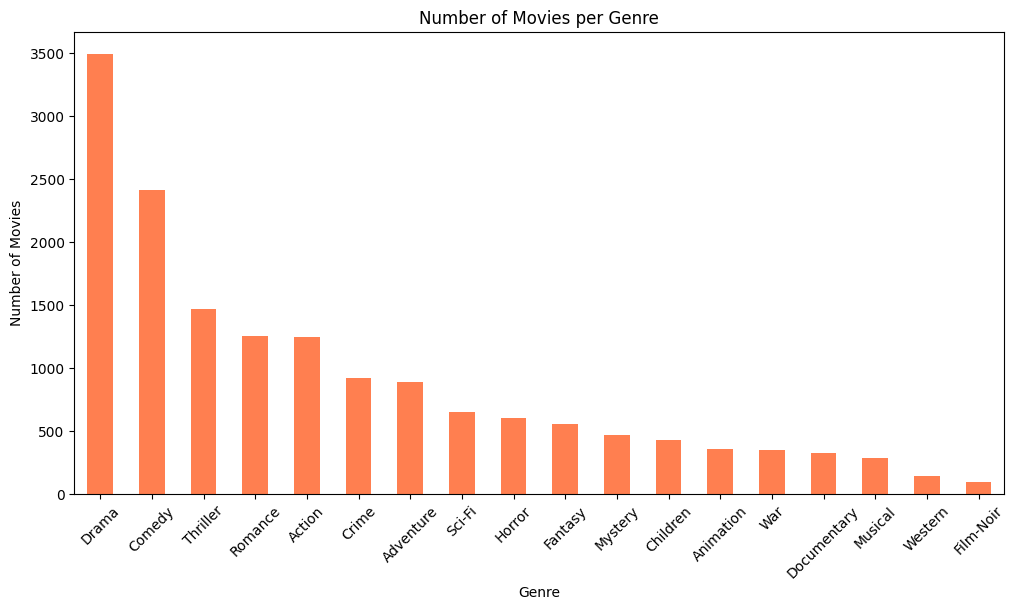

In [38]:
# 각 장르별 빈도
genre_counts = genre_data['genre'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='coral')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [39]:
# 영화별 장르의 개수
genres_per_movie = genre_data.groupby('item')['genre'].count()

print(genres_per_movie.sort_values(ascending=False))

item
81132    10
26701     8
56152     7
43932     7
1907      7
         ..
47274     1
47423     1
47518     1
47629     1
47640     1
Name: genre, Length: 6807, dtype: int64


/tmp/ipykernel_393588/4773381.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count_distribution.index, y=genre_count_distribution.values, palette='viridis')


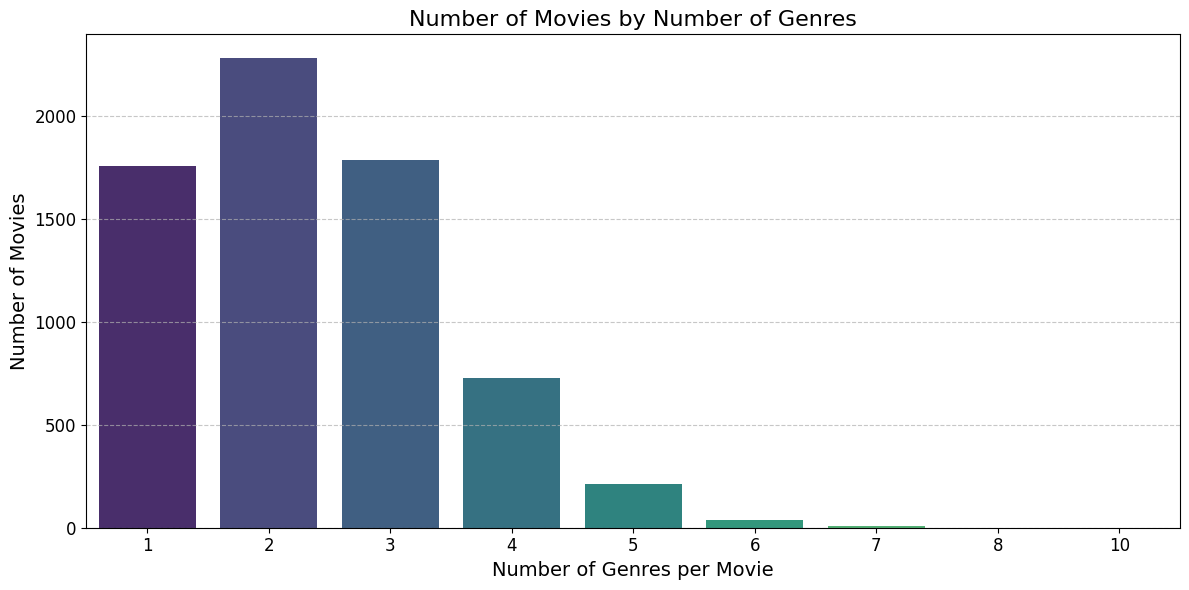

In [40]:
# 장르 개수별 영화 개수
genre_count_distribution = genres_per_movie.value_counts().sort_index()

# 장르 개수별 영화 개수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count_distribution.index, y=genre_count_distribution.values, palette='viridis')
plt.xlabel('Number of Genres per Movie', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Number of Movies by Number of Genres', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer

# genre_data에서 장르를 리스트로 변환
genre_data['genre_list'] = genre_data['genre'].apply(lambda x: x.split(','))

# item별로 장르 리스트를 결합
genres_per_item = genre_data.groupby('item')['genre_list'].agg(lambda x: sum(x, [])).reset_index()

# all_data에 병합
all_data = pd.merge(all_data, genres_per_item, on='item', how='left')

# MultiLabelBinarizer를 사용하여 장르 정보를 이진 벡터로 변환
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(all_data['genre_list'].fillna(''))

# 결과를 DataFrame으로 변환
genre_encoded_df = pd.DataFrame(genre_encoded, columns=['genre_' + genre for genre in mlb.classes_])

# all_data에 인코딩된 장르 정보 추가
all_data = pd.concat([all_data, genre_encoded_df], axis=1)

# 필요 없는 열 삭제
all_data.drop(columns=['genre_list'], inplace=True)

In [42]:
all_data.head()

,user,item,time,date,title,year,writer_list,genre_Action,genre_Adventure,genre_Animation,...,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,11,4643,1230782529,2009-01-01 04:02:09,Planet of the Apes,2001.0,"[nm0099541, nm0115310, nm0465199, nm0742797]",1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,11,170,1230782534,2009-01-01 04:02:14,Hackers,1995.0,[],1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,11,531,1230782539,2009-01-01 04:02:19,"Secret Garden, The",1993.0,"[nm0003031, nm0122364]",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,616,1230782542,2009-01-01 04:02:22,"Aristocats, The",1970.0,"[nm0027011, nm0166307, nm0166551, nm0314788, n...",0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,11,2140,1230782563,2009-01-01 04:02:43,"Dark Crystal, The",1982.0,"[nm0001345, nm0643973]",0,1,0,...,1,0,0,0,0,0,0,0,0,0


장르를 개별 컬럼으로 쓰던지, 개별 입력 레이어로 따로 처리하던지 해야 함

감독 데이터

iMDb 고유 식별자

In [45]:
print(director_data[director_data['item']==34048])
print(director_data[director_data['item']==64997])

      item   director
384  34048  nm0000229
Empty DataFrame
Columns: [item, director]
Index: []


In [26]:
print(director_data['item'].nunique())
# 감독이 없는 영화 6807 - 5503 = 1304개

5503


In [48]:
director_data.isna().sum()

item        0
director    0
dtype: int64

In [45]:
# 감독 수
director_data['director'].nunique()

1340

In [50]:
# 각 감독의 영화 수
director_counts = director_data['director'].value_counts()
director_counts.head(10)

director
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
nm0001752    23
nm0943758    20
nm0000165    20
nm0000631    19
nm0001379    19
Name: count, dtype: int64

In [46]:
# 감독이 없는 영화 확인
movies_with_directors = director_data['item'].unique()
all_movies = all_data['item'].unique()

# 감독이 없는 영화 ID 찾기
movies_without_directors = set(all_movies) - set(movies_with_directors)

print("Number of movies without directors:", len(movies_without_directors))
print("Movies without directors:", movies_without_directors)

Number of movies without directors: 1304
Movies without directors: {40966, 27, 8221, 31, 73759, 8225, 8228, 65588, 32825, 63, 65, 41025, 8260, 49225, 74, 73808, 8273, 82, 32853, 85, 8291, 65642, 114795, 49263, 116, 57464, 82041, 73854, 32898, 73860, 65682, 147, 73881, 90266, 57502, 49312, 171, 172, 82093, 8366, 181, 98491, 188, 8401, 8404, 214, 82143, 224, 90345, 90357, 82173, 90374, 8456, 280, 8482, 8485, 57637, 8492, 302, 8501, 33085, 321, 322, 82242, 324, 8530, 65882, 74089, 363, 33136, 49526, 8573, 8574, 8575, 8581, 8584, 393, 8589, 405, 409, 8604, 421, 427, 442, 65982, 57792, 449, 115149, 468, 8666, 8667, 8675, 49649, 8695, 8711, 8712, 522, 8726, 543, 33312, 115231, 548, 8751, 8753, 57910, 41527, 569, 8765, 8784, 8795, 82527, 611, 8805, 8809, 90738, 627, 57972, 8827, 57980, 74370, 8861, 8862, 671, 673, 674, 8865, 33451, 33454, 33463, 90809, 58047, 49856, 709, 8906, 720, 8918, 58078, 735, 737, 743, 746, 8938, 8939, 760, 41721, 8967, 74508, 66317, 33564, 66335, 8998, 58154, 58156, 8

영화 6807개 중에 1304개가 감독이 없음  
사용 안 하거나 결측치 처리

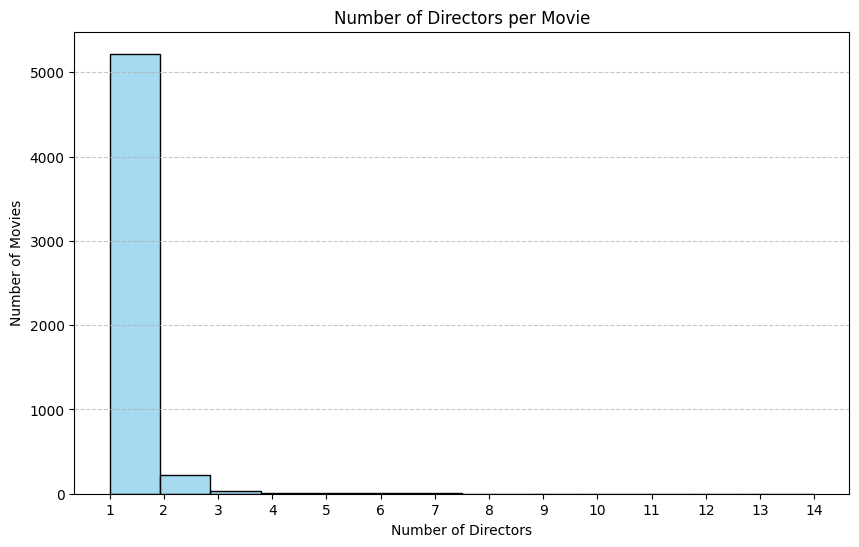

In [62]:
directors_per_movie = director_data.groupby('item')['director'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(directors_per_movie, kde=False, color='skyblue')
plt.title('Number of Directors per Movie')
plt.xlabel('Number of Directors')
plt.ylabel('Number of Movies')
plt.xticks(range(1, directors_per_movie.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Active user 정보

In [27]:
active_user_ids = train_df.value_counts('user').index[:10]
popular_movie_ids = train_df.value_counts('item').index[:10]

print ("active user ids: ", active_user_ids)
print ("\npopular movie ids: ", popular_movie_ids)

active user ids:  Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122, 118754], dtype='int64', name='user')

popular movie ids:  Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


시간 정보?

In [ ]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))